In [1]:
#need to insert image of avocados in here
#<img src="https://t3.ftcdn.net/jpg/02/15/55/74/360_F_215557461_4i6XqmzKjHGDoZoIiiCXiZELpYrRZTyT.jpg" alt="Header Image" width="
#1000" height="250"/>

# QCTO - Workplace Module

### Project Title: Analysing Veggie Prices
#### Done By: Ruben Juries

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This project focuses on analyzing avocado sales and pricing data to uncover trends and insights. The analysis includes data cleaning, filtering, and exploratory data analysis (EDA). Insights gained from this analysis can help in understanding the avocado market and predicting future trends.

* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [2]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd # Importing the Pandas package with an alias, pd
from sqlalchemy import create_engine, text # Importing the SQL interface. If this fails, run !pip install sqlalchemy in another cell.
import matplotlib.pyplot as plt
import seaborn as sns
import re #this import regex package for Python used in data cleaning

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The dataset used in this project is sourced from Kaggle's Avocado Prices dataset. It contains data on avocado prices and sales volume from various regions in the U.S. between 2015 and 2018.

* **Details:** The data was collected from the dataset repositories.Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
 
* **Data Fields:**
- `Date`: The date of the observation.
- `AveragePrice`: The average price of a single avocado.
- `Total Volume`: The total number of avocados sold.
- `4046`, `4225`, `4770`: Different avocado types based on PLU codes.
- `Region`: The geographical region.
- `Type`: The type of avocado (conventional or organic).
- `Year`: The year of the observation.


In [3]:
#Please use code cells to code in and do not forget to comment your code.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The data is loaded into a Pandas DataFrame for easy manipulation:
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [4]:
#Please use code cells to code in and do not forget to comment your code.
df = pd.read_csv("prices.csv")
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [5]:
df.info() # Using this function to provide a concise summary of our data and to check for null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [6]:
print(df.columns)


Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


In [7]:
print (df['Price Dates'])

0      01-01-2023
1      02-01-2023
2      03-01-2023
3      04-01-2023
4      08-01-2023
          ...    
282    27-12-2023
283    28-12-2023
284    29-12-2023
285    31-12-2023
286    01-01-2024
Name: Price Dates, Length: 287, dtype: object


In [8]:
df.describe() # Using the describe function to view summary statistics on our data in order to have an overview.

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** This DataFrame will be used for all subsequent analysis.

---

In [9]:
#Please use code cells to code in and do not forget to comment your code.
#Please use code cells to code in and do not forget to comment your code.
''' This code will take the headings from dataframe and convert them into PEP 8 compliant headings and then replace the dataframe headings'''

def pep8_compliant_column_names(df):
    """
    Convert DataFrame column names to PEP 8 compliant names.
    
    Parameters:
    df (pd.DataFrame): The DataFrame with column names to convert.
    
    Returns:
    pd.DataFrame: DataFrame with updated column names.
    """
    def convert_to_pep8(name):
        # Replace spaces with underscores
        name = re.sub(r'\s+', '_', name)
        # Insert underscores between adjacent capitalized words
        name = re.sub(r'(?<=[a-z])(?=[A-Z])', '_', name)
        # Convert to lowercase
        name = name.lower()
        # Remove any non-alphanumeric characters except underscores
        name = re.sub(r'[^\w_]', '', name)
        # Replace multiple underscores with a single underscore
        name = re.sub(r'_+', '_', name)
        return name

    # Apply PEP 8 compliance to each column name
    new_columns = [convert_to_pep8(col) for col in df.columns]
    
    # Set the new column names
    df.columns = new_columns
    
    return df

In [10]:
df = pep8_compliant_column_names(df)
print(df.head())

  price_dates  bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
0  01-01-2023                  35.0      18   22.0      20       30      50   
1  02-01-2023                  35.0      16   22.0      20       30      55   
2  03-01-2023                  35.0      16   21.0      20       30      55   
3  04-01-2023                  30.0      16   21.0      22       25      55   
4  08-01-2023                  35.0      16   20.0      21       25      55   

   peas  methi  green_chilli  elephant_yam_suran  
0    25      8          45.0                  25  
1    25      7          40.0                  25  
2    25      7          40.0                  25  
3    25      7          40.0                  25  
4    22      6          35.0                  25  


In [11]:
df.isnull().sum # Checking for missing values

<bound method DataFrame.sum of      price_dates  bhindi_ladies_finger  tomato  onion  potato  brinjal  \
0          False                 False   False  False   False    False   
1          False                 False   False  False   False    False   
2          False                 False   False  False   False    False   
3          False                 False   False  False   False    False   
4          False                 False   False  False   False    False   
..           ...                   ...     ...    ...     ...      ...   
282        False                 False   False  False   False    False   
283        False                 False   False  False   False    False   
284        False                 False   False  False   False    False   
285        False                 False   False  False   False    False   
286        False                 False   False  False   False    False   

     garlic   peas  methi  green_chilli  elephant_yam_suran  
0     False  False

In [12]:
# Find and display the number of null values in each column
null_values = df.isnull().sum()
print("\nNull Values in Each Column:")
print(null_values)

# Display the total number of missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal Missing Values in the Dataset: {total_missing}")

# Exclude rows with any null values
data_cleaned = df.dropna()

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset:")
print(data_cleaned.head())

# Display the number of rows and columns in the original and cleaned datasets
print(f"\nOriginal Dataset Shape: {df.shape}")
print(f"Cleaned Dataset Shape: {data_cleaned.shape}")


Null Values in Each Column:
price_dates             0
bhindi_ladies_finger    0
tomato                  0
onion                   0
potato                  0
brinjal                 0
garlic                  0
peas                    0
methi                   0
green_chilli            0
elephant_yam_suran      0
dtype: int64

Total Missing Values in the Dataset: 0

Cleaned Dataset:
  price_dates  bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
0  01-01-2023                  35.0      18   22.0      20       30      50   
1  02-01-2023                  35.0      16   22.0      20       30      55   
2  03-01-2023                  35.0      16   21.0      20       30      55   
3  04-01-2023                  30.0      16   21.0      22       25      55   
4  08-01-2023                  35.0      16   20.0      21       25      55   

   peas  methi  green_chilli  elephant_yam_suran  
0    25      8          45.0                  25  
1    25      7          40.0         

In [13]:
import pandas as pd

df = pd.DataFrame(df)

# Find unique values in each column
unique_counts = df.nunique()

print(unique_counts)


price_dates             287
bhindi_ladies_finger     34
tomato                    2
onion                    42
potato                   12
brinjal                  13
garlic                   22
peas                     24
methi                    21
green_chilli             16
elephant_yam_suran       12
dtype: int64


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [14]:
df.columns

Index(['price_dates', 'bhindi_ladies_finger', 'tomato', 'onion', 'potato',
       'brinjal', 'garlic', 'peas', 'methi', 'green_chilli',
       'elephant_yam_suran'],
      dtype='object')

In [15]:
df.columns = df.columns.str.strip()
print(df.columns)
print(df.columns.duplicated())
print(df.head())


Index(['price_dates', 'bhindi_ladies_finger', 'tomato', 'onion', 'potato',
       'brinjal', 'garlic', 'peas', 'methi', 'green_chilli',
       'elephant_yam_suran'],
      dtype='object')
[False False False False False False False False False False False]
  price_dates  bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
0  01-01-2023                  35.0      18   22.0      20       30      50   
1  02-01-2023                  35.0      16   22.0      20       30      55   
2  03-01-2023                  35.0      16   21.0      20       30      55   
3  04-01-2023                  30.0      16   21.0      22       25      55   
4  08-01-2023                  35.0      16   20.0      21       25      55   

   peas  methi  green_chilli  elephant_yam_suran  
0    25      8          45.0                  25  
1    25      7          40.0                  25  
2    25      7          40.0                  25  
3    25      7          40.0                  25  
4    22      6

In [16]:
df['price_dates'] = pd.to_datetime(df['price_dates'], format='%d-%m-%Y')
df.set_index('price_dates', inplace=True)


In [17]:
print(df.head())

             bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
price_dates                                                                 
2023-01-01                   35.0      18   22.0      20       30      50   
2023-01-02                   35.0      16   22.0      20       30      55   
2023-01-03                   35.0      16   21.0      20       30      55   
2023-01-04                   30.0      16   21.0      22       25      55   
2023-01-08                   35.0      16   20.0      21       25      55   

             peas  methi  green_chilli  elephant_yam_suran  
price_dates                                                 
2023-01-01     25      8          45.0                  25  
2023-01-02     25      7          40.0                  25  
2023-01-03     25      7          40.0                  25  
2023-01-04     25      7          40.0                  25  
2023-01-08     22      6          35.0                  25  


In [18]:
##Hypothesis all these veggies increase in prices over time

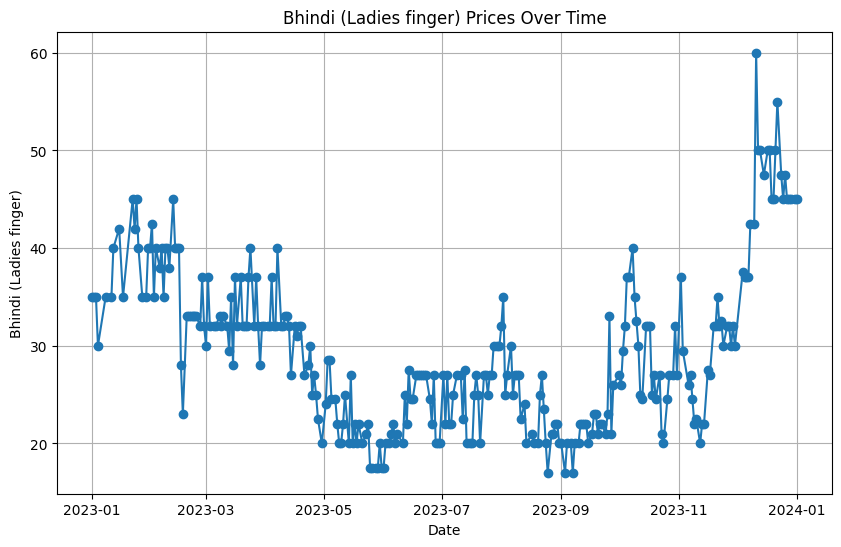

In [19]:
#Try code for running line graph with all the features
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'price_dates' to datetime format with the correct format


# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], marker='o')
plt.title('Bhindi (Ladies finger) Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Bhindi (Ladies finger)')
plt.grid(True)
plt.show()





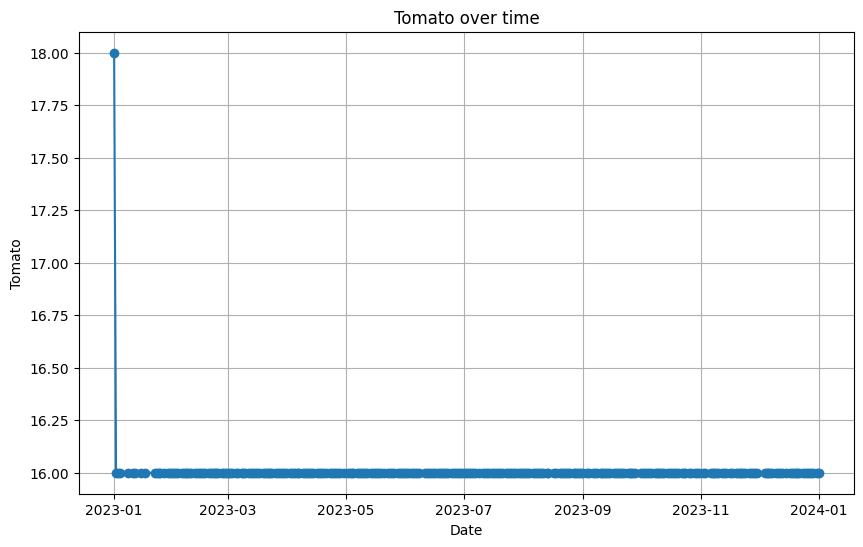

In [20]:
#Please use code cells to code in and do not forget to comment your code.
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['tomato'], marker='o')
plt.title('Tomato over time')
plt.xlabel('Date')
plt.ylabel('Tomato')
plt.grid(True)
plt.show()


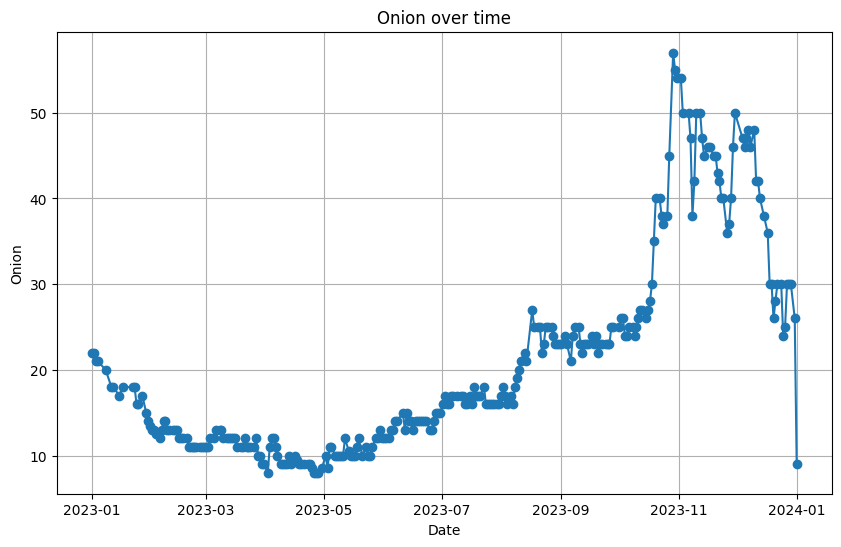

In [21]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['onion'], marker='o')
plt.title('Onion over time')
plt.xlabel('Date')
plt.ylabel('Onion')
plt.grid(True)
plt.show()

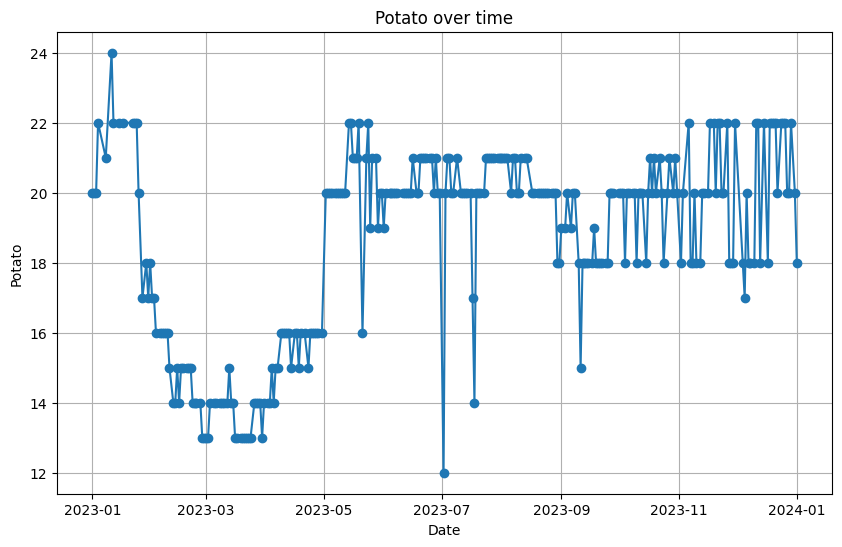

In [22]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['potato'], marker='o')
plt.title('Potato over time')
plt.xlabel('Date')
plt.ylabel('Potato')
plt.grid(True)
plt.show()

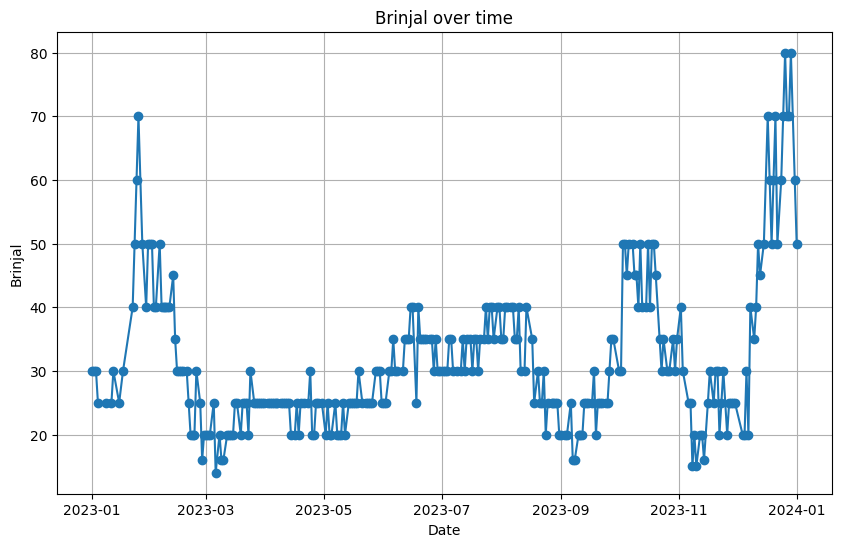

In [23]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['brinjal'], marker='o')
plt.title('Brinjal over time')
plt.xlabel('Date')
plt.ylabel('Brinjal')
plt.grid(True)
plt.show()

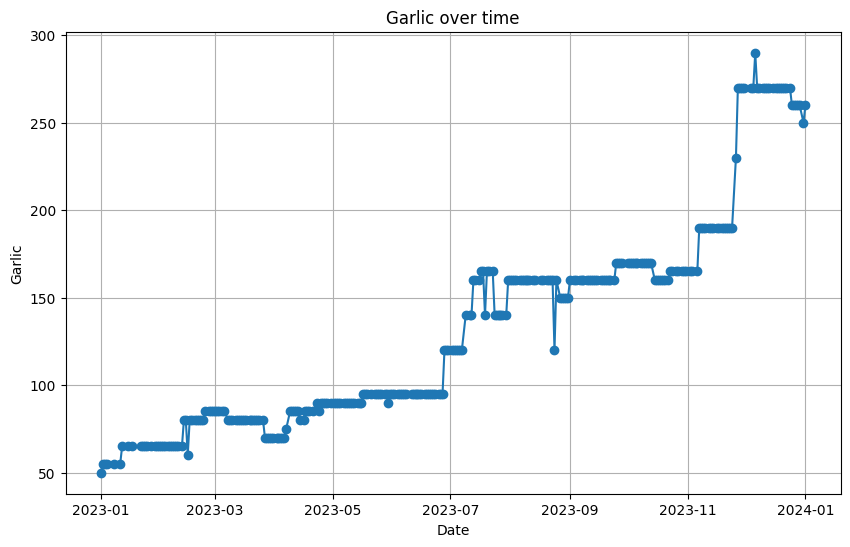

In [24]:
# Convert 'price_dates' to datetime format with the correct format
# Plot the time series line graph
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['garlic'], marker='o')
plt.title('Garlic over time')
plt.xlabel('Date')
plt.ylabel('Garlic')
plt.grid(True)
plt.show()

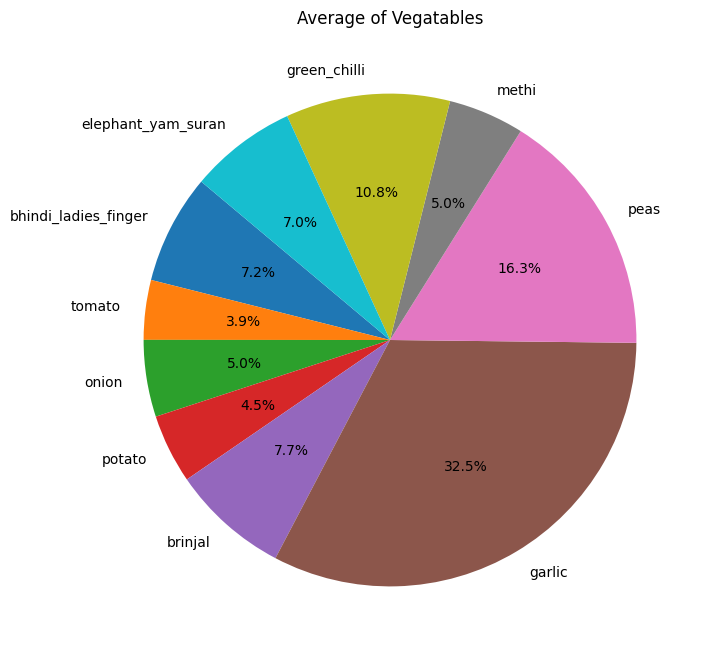

In [25]:
##Pie chart looking at the biggest average veggie price contributor
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
#data = {
#    'Feature A': [23, 45, 12, 67],
#    'Feature B': [17, 34, 23, 45],
#    'Feature C': [35, 23, 45, 67],
 #   'Feature D': [29, 56, 34, 23]
#}
#df = pd.DataFrame(data)

# Calculate averages
averages = df.mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(averages, labels=averages.index, autopct='%1.1f%%', startangle=140)
plt.title('Average of Vegatables')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [26]:
print(df.head())

             bhindi_ladies_finger  tomato  onion  potato  brinjal  garlic  \
price_dates                                                                 
2023-01-01                   35.0      18   22.0      20       30      50   
2023-01-02                   35.0      16   22.0      20       30      55   
2023-01-03                   35.0      16   21.0      20       30      55   
2023-01-04                   30.0      16   21.0      22       25      55   
2023-01-08                   35.0      16   20.0      21       25      55   

             peas  methi  green_chilli  elephant_yam_suran  
price_dates                                                 
2023-01-01     25      8          45.0                  25  
2023-01-02     25      7          40.0                  25  
2023-01-03     25      7          40.0                  25  
2023-01-04     25      7          40.0                  25  
2023-01-08     22      6          35.0                  25  


In [27]:
#bhindi_ladies_finger', 'tomato', 'onion', 'potato',
#       'brinjal', 'garlic', 'peas', 'methi', 'green_chilli',
#       'elephant_yam_suran'],
#      dtype='object')
#df.columns = df.columns.str.strip()
#print(df.columns)
#print(df.columns.duplicated())
#print(df.head())

#Index(['price_dates', 'bhindi_ladies_finger', 'tomato', 'onion', 'potato',
#       'brinjal', 'garlic', 'peas', 'methi', 'green_chilli',
#       'elephant_yam_suran'

In [28]:
#Please use code cells to code in and do not forget to comment your code.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
# Time is an independent variable on X axis which is the price dates
#Y the dependant varialbe as its influenced by time


#features = ['feature1', 'feature2', 'feature3']  # Replace with actual feature column names
#target = 'target_column'  # Replace with actual target column name

X = df['price_dates']
y = df.drop(columns=['price_dates'])  # Exclude the target variable
 

#X = data[features]
#y = data[target]

#Scale the independant variables
# Step 1: Scale the dependent variables
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Measure accuracy using Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print("\nMean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Display the first few predictions along with actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nFirst Few Predictions:")
print(results.head())


KeyError: 'price_dates'

In [ ]:
#Lets run forecasts on multiple vegetable prices at the same time
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Sample data for multiple vegetable prices over time
#data = {
#    'date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
#    'carrot_price': np.random.rand(365) * 10 + 20,
#    'potato_price': np.random.rand(365) * 5 + 15,
#    'tomato_price': np.random.rand(365) * 8 + 18
#}

# Create DataFrame
#df = pd.DataFrame(data)
#df.set_index('date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], label='Bhindi Prices')
plt.plot(df.index, df['tomato'], label='Tomato Prices')
plt.plot(df.index, df['onion'], label='Onion Prices')
plt.plot(df.index, df['potato'], label='Potato Prices')
plt.plot(df.index, df['brinjal'], label='Brinjal Prices')
plt.plot(df.index, df['garlic'], label='Garlic Prices')
plt.plot(df.index, df['onion'], label='Onion Prices')
plt.plot(df.index, df['peas'], label='Peas Prices')
plt.plot(df.index, df['methi'], label='Methi Prices')
plt.plot(df.index, df['green_chilli'], label='Green Chili Prices')
plt.plot(df.index, df['elephant_yam_suran'], label='Elephant_yam Prices')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Over Time')
plt.legend()
plt.show()

# Function to forecast prices for a given vegetable
def forecast_prices(df, column, periods=30):
    model = ExponentialSmoothing(df[column], trend='add', seasonal='add', seasonal_periods=30)
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Forecast the next 30 days for each vegetable
bhindi_forecast = forecast_prices(df, 'bhindi_ladies_finger')
tomato_forecast = forecast_prices(df, 'tomato')
onion_forecast = forecast_prices(df, 'onion')
potato_forecast = forecast_prices(df, 'potato')
brinjal_forecast =  forecast_prices(df, 'brinjal')
garlic_forecast = forecast_prices(df, 'garlic')
peas_forecast = forecast_prices(df, 'peas')
methi_forecast = forecast_prices(df, 'methi')
green_chilli_forecast = forecast_prices(df, 'green_chilli')
elephant_yam_suran_forecast = forecast_prices(df, 'elephant_yam_suran')




# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], label='Observed bhindi_ladies_finger Prices')
plt.plot(bhindi_forecast.index, bhindi_forecast, label='Forecasted bhindi Prices', linestyle='--')

plt.plot(df.index, df['tomato'], label='Observed tomato Prices')
plt.plot(tomato_forecast.index, tomato_forecast, label='Forecasted tomato Prices', linestyle='--')

plt.plot(df.index, df['onion'], label='Observed onion Prices')
plt.plot(onion_forecast.index, onion_forecast, label='Forecasted onion Prices', linestyle='--')

plt.plot(df.index, df['potato'], label='Observed potato Prices')
plt.plot(potato_forecast.index, potato_forecast, label='Forecasted potato Prices', linestyle='--')

plt.plot(df.index, df['brinjal'], label='Observed brinjal Prices')
plt.plot(brinjal_forecast.index, brinjal_forecast, label='Forecasted brinjal Prices', linestyle='--')

plt.plot(df.index, df['garlic'], label='Observed garlic Prices')
plt.plot(garlic_forecast.index, garlic_forecast, label='Forecasted garlic Prices', linestyle='--')

plt.plot(df.index, df['peas'], label='Observed peas Prices')
plt.plot(peas_forecast.index, peas_forecast, label='Forecasted peas Prices', linestyle='--')

plt.plot(df.index, df['methi'], label='Observed methi Prices')
plt.plot(methi_forecast.index, methi_forecast, label='Forecasted methi Prices', linestyle='--')

plt.plot(df.index, df['green_chilli'], label='Observed green_chilli Prices')
plt.plot(green_chilli_forecast.index, green_chilli_forecast, label='Forecasted green_chilli Prices', linestyle='--')

plt.plot(df.index, df['elephant_yam_suran'], label='Observed elephant_yam_suran Prices')
plt.plot(elephant_yam_suran_forecast.index, elephant_yam_suran_forecast, label='Forecasted elephant_yam_suran Prices', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast')
plt.legend()
plt.show()


print ("bhindi_forecast:\n", bhindi_forecast)
print ("tomato_forecast:\n", tomato_forecast)
print ("onion_forecast:\n", onion_forecast)
print ("potato_forecast:\n", potato_forecast)
print ("brinjal_forecast:\n", brinjal_forecast)
print ("garlic_forecast:\n", garlic_forecast)
print ("peas_forecast:\n", peas_forecast)
print ("methi_forecast:\n", methi_forecast)
print ("green_chilli:\n", green_chilli_forecast)
print ("elephant_yam:\n", elephant_yam_suran_forecast)


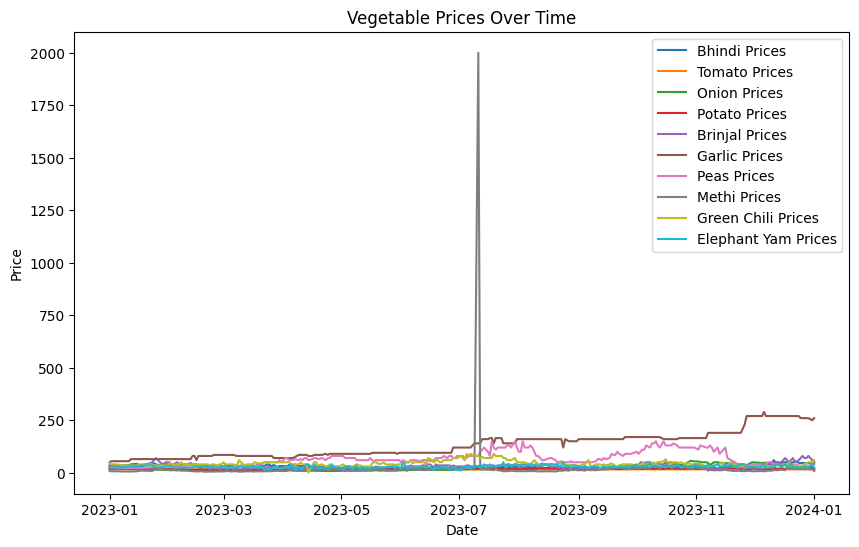

C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. 

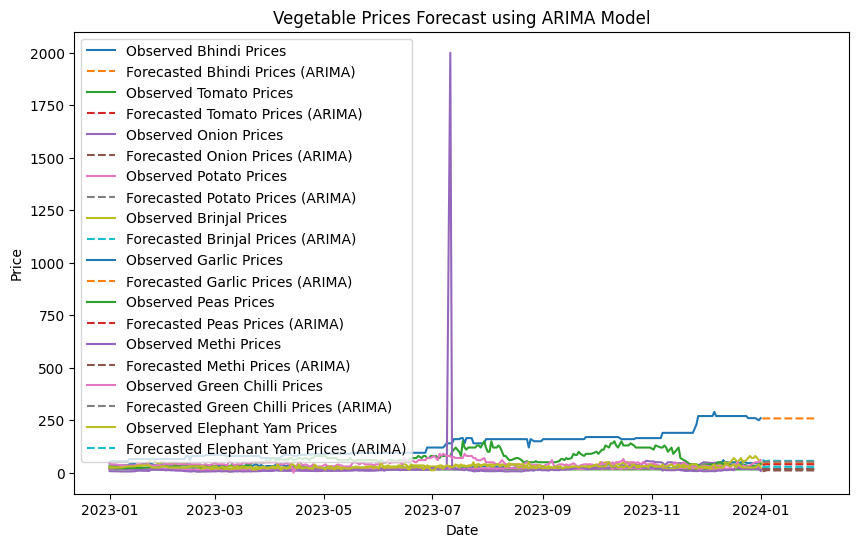

Bhindi Forecast (ARIMA):
 287    45.151897
288    45.081993
289    45.088562
290    45.077036
291    45.076853
292    45.075085
293    45.081123
294    45.079308
295    45.080079
296    45.079394
297    45.079384
298    45.079198
299    45.079418
300    45.079364
301    45.079419
302    45.079391
303    45.079393
304    45.079381
305    45.079388
306    45.079386
307    45.079389
308    45.079388
309    45.079388
310    45.079388
311    45.079388
312    45.079388
313    45.079388
314    45.079388
315    45.079388
316    45.079388
Name: predicted_mean, dtype: float64
Tomato Forecast (ARIMA):
 287    16.0
288    16.0
289    16.0
290    16.0
291    16.0
292    16.0
293    16.0
294    16.0
295    16.0
296    16.0
297    16.0
298    16.0
299    16.0
300    16.0
301    16.0
302    16.0
303    16.0
304    16.0
305    16.0
306    16.0
307    16.0
308    16.0
309    16.0
310    16.0
311    16.0
312    16.0
313    16.0
314    16.0
315    16.0
316    16.0
Name: predicted_mean, dtype: float64
Onio

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample data for multiple vegetable prices over time
#data = {
#    'date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
#    'bhindi_ladies_finger': np.random.rand(365) * 10 + 20,
##    'tomato': np.random.rand(365) * 8 + 18,
#    'potato': np.random.rand(365) * 5 + 15,
#    'brinjal': np.random.rand(365) * 7 + 17,
#    'garlic': np.random.rand(365) * 12 + 25,
 #   'peas': np.random.rand(365) * 6 + 16,
#    'methi': np.random.rand(365) * 9 + 19,
#    'green_chilli': np.random.rand(365) * 11 + 22,
#    'elephant_yam_suran': np.random.rand(365) * 13 + 28
#}

## Create DataFrame
#df = pd.DataFrame(data)
#df.set_index('date', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], label='Bhindi Prices')
plt.plot(df.index, df['tomato'], label='Tomato Prices')
plt.plot(df.index, df['onion'], label='Onion Prices')
plt.plot(df.index, df['potato'], label='Potato Prices')
plt.plot(df.index, df['brinjal'], label='Brinjal Prices')
plt.plot(df.index, df['garlic'], label='Garlic Prices')
plt.plot(df.index, df['peas'], label='Peas Prices')
plt.plot(df.index, df['methi'], label='Methi Prices')
plt.plot(df.index, df['green_chilli'], label='Green Chili Prices')
plt.plot(df.index, df['elephant_yam_suran'], label='Elephant Yam Prices')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Over Time')
plt.legend()
plt.show()

# Function to forecast prices for a given vegetable using ARIMA model
def forecast_prices_arima(df, column, periods=30):
    model = ARIMA(df[column], order=(5,1,0))
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Forecast the next 30 days for each vegetable using ARIMA model
bhindi_forecast_arima = forecast_prices_arima(df, 'bhindi_ladies_finger')
tomato_forecast_arima = forecast_prices_arima(df, 'tomato')
onion_forecast_arima = forecast_prices_arima(df, 'onion')
potato_forecast_arima = forecast_prices_arima(df, 'potato')
brinjal_forecast_arima = forecast_prices_arima(df, 'brinjal')
garlic_forecast_arima = forecast_prices_arima(df, 'garlic')
peas_forecast_arima = forecast_prices_arima(df, 'peas')
methi_forecast_arima = forecast_prices_arima(df, 'methi')
green_chilli_forecast_arima = forecast_prices_arima(df, 'green_chilli')
elephant_yam_suran_forecast_arima = forecast_prices_arima(df, 'elephant_yam_suran')

# Plot the forecasted data using ARIMA model
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['bhindi_ladies_finger'], label='Observed Bhindi Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], bhindi_forecast_arima, label='Forecasted Bhindi Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['tomato'], label='Observed Tomato Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], tomato_forecast_arima, label='Forecasted Tomato Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['onion'], label='Observed Onion Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], onion_forecast_arima, label='Forecasted Onion Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['potato'], label='Observed Potato Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], potato_forecast_arima, label='Forecasted Potato Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['brinjal'], label='Observed Brinjal Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], brinjal_forecast_arima, label='Forecasted Brinjal Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['garlic'], label='Observed Garlic Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], garlic_forecast_arima, label='Forecasted Garlic Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['peas'], label='Observed Peas Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], peas_forecast_arima, label='Forecasted Peas Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['methi'], label='Observed Methi Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], methi_forecast_arima, label='Forecasted Methi Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['green_chilli'], label='Observed Green Chilli Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], green_chilli_forecast_arima, label='Forecasted Green Chilli Prices (ARIMA)', linestyle='--')

plt.plot(df.index, df['elephant_yam_suran'], label='Observed Elephant Yam Prices')
plt.plot(pd.date_range(start=df.index[-1], periods=31, freq='D')[1:], elephant_yam_suran_forecast_arima, label='Forecasted Elephant Yam Prices (ARIMA)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast using ARIMA Model')
plt.legend()
plt.show()

print("Bhindi Forecast (ARIMA):\n", bhindi_forecast_arima)
print("Tomato Forecast (ARIMA):\n", tomato_forecast_arima)
print("Onion Forecast (ARIMA):\n", onion_forecast_arima)
print("Potato Forecast (ARIMA):\n", potato_forecast_arima)
print("Brinjal Forecast (ARIMA):\n", brinjal_forecast_arima)
print("Garlic Forecast (ARIMA):\n", garlic_forecast_arima)
print("Peas Forecast (ARIMA):\n", peas_forecast_arima)
print("Methi Forecast (ARIMA):\n", methi_forecast_arima)
print("Green Chilli Forecast (ARIMA):\n", green_chilli_forecast_arima)
print("Elephant Yam Forecast (ARIMA):\n", elephant_yam_suran_forecast_arima)


C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, bu

              Vegetable  Holt-Winters MSE    ARIMA MSE
0  bhindi_ladies_finger        202.999140   172.651878
1                tomato          0.001507     0.000000
2                 onion        137.588592   110.268456
3                potato          3.102064     4.002670
4               brinjal        934.387349   852.286481
5                garlic       4425.878535  5753.333333
6                  peas      13875.932355    26.352473
7                 methi        470.451396    46.543666
8          green_chilli         80.627918    68.158648
9    elephant_yam_suran         65.953950    53.650153


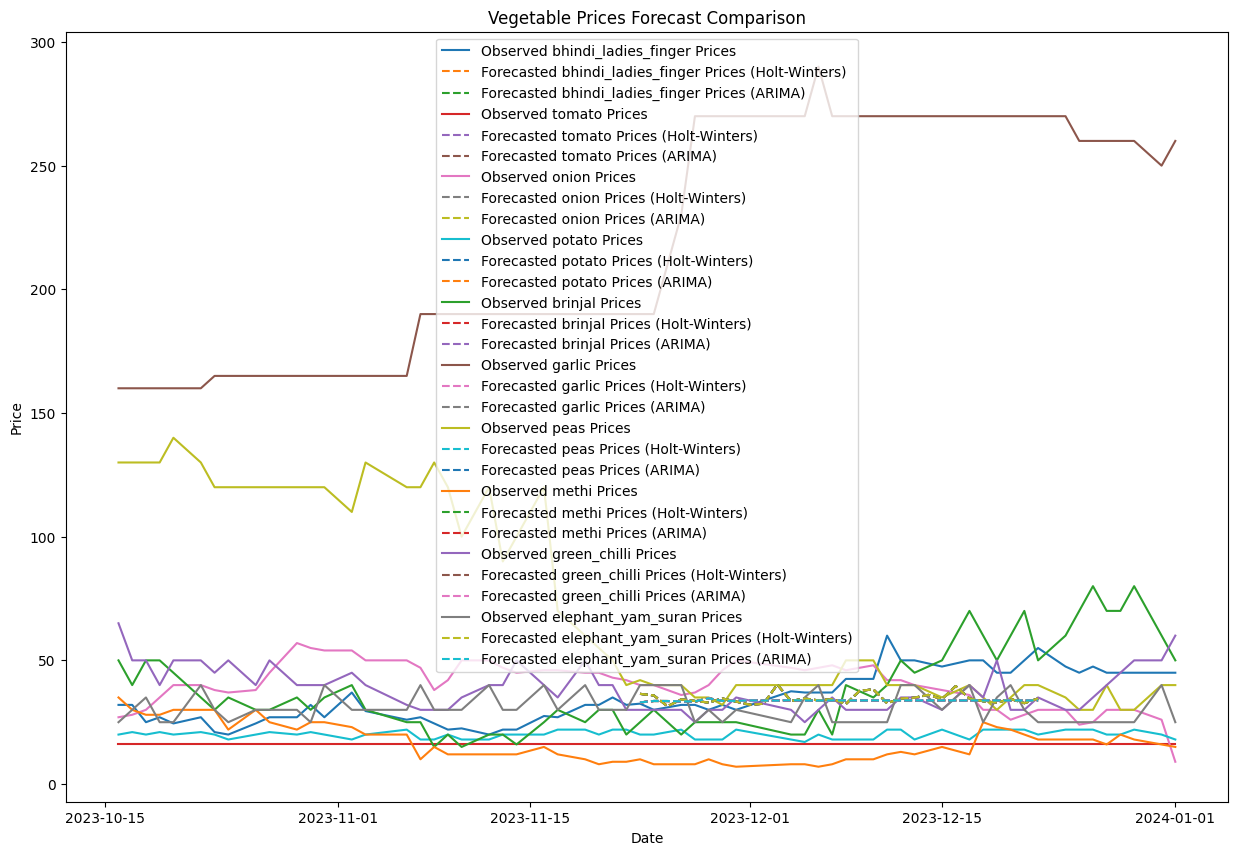

In [30]:
#forecast predictions using Holt winters and Arima....Model1)

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Sample data for multiple vegetable prices over time
#data = {
##    'date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
#    'bhindi_ladies_finger': np.random.rand(365) * 10 + 20,
#    'tomato': np.random.rand(365) * 8 + 18,
#    'onion': np.random.rand(365) * 5 + 15,
#    'potato': np.random.rand(365) * 5 + 15,
#    'brinjal': np.random.rand(365) * 7 + 17,
#    'garlic': np.random.rand(365) * 12 + 25,
#    'peas': np.random.rand(365) * 6 + 16,
#    'methi': np.random.rand(365) * 9 + 19,
#    'green_chilli': np.random.rand(365) * 11 + 22,
#    'elephant_yam_suran': np.random.rand(365) * 13 + 28
#}

# Create DataFrame
#df = pd.DataFrame(data)
#df.set_index('date', inplace=True)

# Function to forecast prices using Holt-Winters method
def forecast_prices_holtwinters(df, column, periods=30):
    model = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=30)
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to forecast prices using ARIMA model
def forecast_prices_arima(df, column, periods=30):
    model = ARIMA(df, order=(5,1,0))
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to calculate mean squared error for the forecasts
def calculate_mse(actual, forecast):
    return mean_squared_error(actual, forecast)

# Forecast the next 30 days for each vegetable using Holt-Winters and ARIMA models
vegetables = ['bhindi_ladies_finger', 'tomato', 'onion', 'potato', 'brinjal', 'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam_suran']
results = []

for veg in vegetables:
    # Split the data into training and test sets
    train_data = df[veg][:-30]
    test_data = df[veg][-30:]
    
    # Forecast using Holt-Winters method
    hw_forecast = forecast_prices_holtwinters(train_data, veg, periods=30)
    
    # Forecast using ARIMA model
    arima_forecast = forecast_prices_arima(train_data, veg, periods=30)
    
    # Calculate MSE for both methods
    hw_mse = calculate_mse(test_data, hw_forecast)
    arima_mse = calculate_mse(test_data, arima_forecast)
    
    results.append({
        'Vegetable': veg,
        'Holt-Winters MSE': hw_mse,
        'ARIMA MSE': arima_mse
    })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

# Plot the observed and forecasted data for all vegetables
plt.figure(figsize=(15, 10))
for veg in vegetables:
    plt.plot(df.index[-60:], df[veg][-60:], label=f'Observed {veg} Prices')
    plt.plot(pd.date_range(start=df.index[-31], periods=30, freq='D'), hw_forecast, label=f'Forecasted {veg} Prices (Holt-Winters)', linestyle='--')
    plt.plot(pd.date_range(start=df.index[-31], periods=30, freq='D'), arima_forecast, label=f'Forecasted {veg} Prices (ARIMA)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast Comparison')
plt.legend()
plt.show()



C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, bu

              Vegetable  Holt-Winters MSE Percentage  ARIMA MSE Percentage
0  bhindi_ladies_finger                    33.211601             30.628686
1                tomato                     0.242589              0.000000
2                 onion                    32.673583             29.250359
3                potato                     8.762526              9.953569
4               brinjal                    65.502322             62.558456
5                garlic                    25.199726             28.731337
6                  peas                   312.180603             13.604592
7                 methi                   158.320376             49.797751
8          green_chilli                    25.655157             23.588072
9    elephant_yam_suran                    26.773199             24.147120


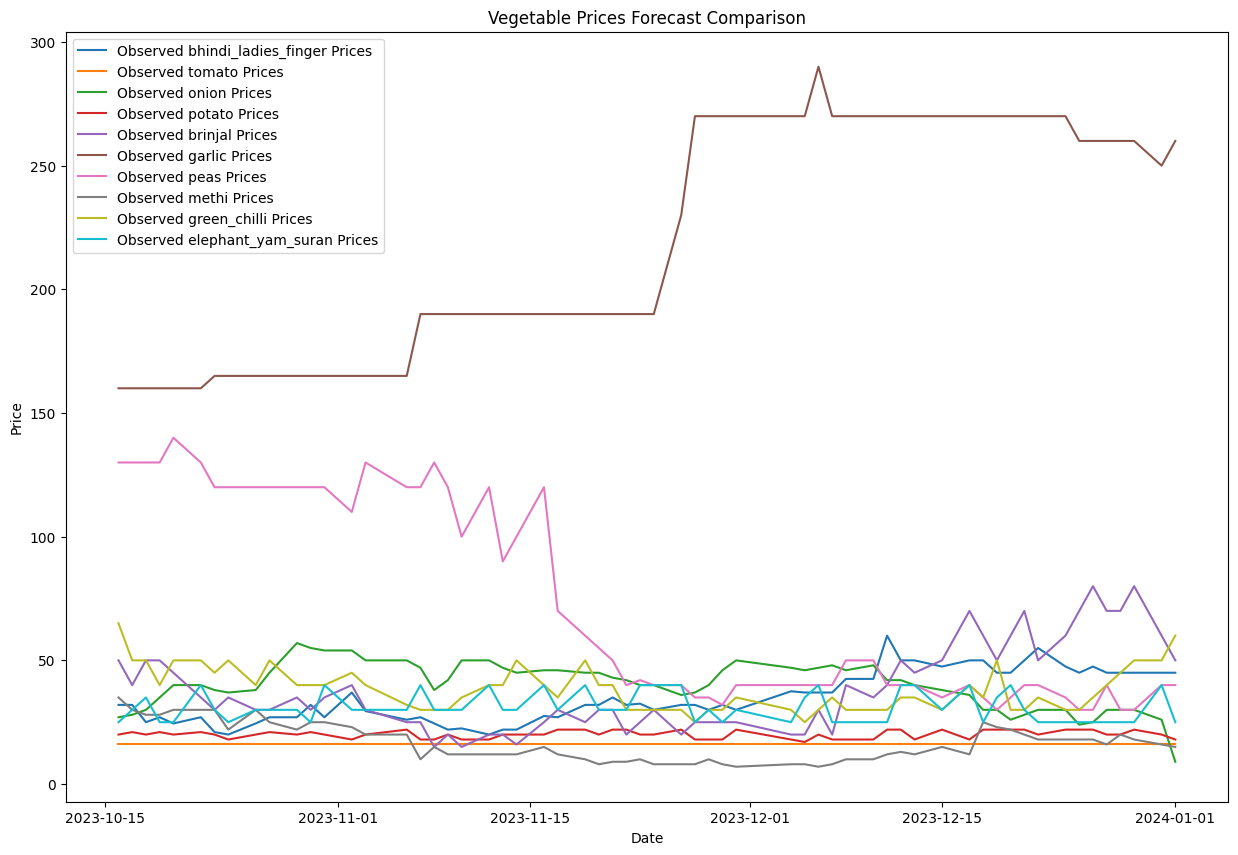

In [32]:
##mean squared error expressed as a percentage for model1)
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Sample data for multiple vegetable prices over time
#data = {
#    'date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
#    'bhindi_ladies_finger': np.random.rand(365) * 10 + 20,
#    'tomato': np.random.rand(365) * 8 + 18,
#    'onion': np.random.rand(365) * 5 + 15,
#    'potato': np.random.rand(365) * 5 + 15,
#    'brinjal': np.random.rand(365) * 7 + 17,
#    'garlic': np.random.rand(365) * 12 + 25,
#    'peas': np.random.rand(365) * 6 + 16,
#    'methi': np.random.rand(365) * 9 + 19,
#    'green_chilli': np.random.rand(365) * 11 + 22,
#    'elephant_yam_suran': np.random.rand(365) * 13 + 28
#}

# Create DataFrame
#df = pd.DataFrame(data)
#df.set_index('date', inplace=True)

# Function to forecast prices using Holt-Winters method
def forecast_prices_holtwinters(df, column, periods=30):
    model = ExponentialSmoothing(df, trend='add', seasonal='add', seasonal_periods=30)
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast
# Function to forecast prices using ARIMA model
def forecast_prices_arima(df, column, periods=30):
    model = ARIMA(df, order=(5,1,0))
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to calculate mean squared error for the forecasts and convert it to percentage
def calculate_mse_percentage(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mean_actual = np.mean(actual)
    rmse_percentage = (rmse / mean_actual) * 100
    return rmse_percentage

# Forecast the next 30 days for each vegetable using Holt-Winters and ARIMA models
vegetables = ['bhindi_ladies_finger', 'tomato', 'onion', 'potato', 'brinjal', 'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam_suran']
results = []

for veg in vegetables:
    # Split the data into training and test sets
    train_data = df[veg][:-30]
    test_data = df[veg][-30:]
    
    # Forecast using Holt-Winters method
    hw_forecast = forecast_prices_holtwinters(train_data, veg, periods=30)
    
    # Forecast using ARIMA model
    arima_forecast = forecast_prices_arima(train_data, veg, periods=30)
    
    # Calculate MSE percentage for both methods
    hw_mse_percentage = calculate_mse_percentage(test_data, hw_forecast)
    arima_mse_percentage = calculate_mse_percentage(test_data, arima_forecast)
    
    results.append({
        'Vegetable': veg,
        'Holt-Winters MSE Percentage': hw_mse_percentage,
        'ARIMA MSE Percentage': arima_mse_percentage
    })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

# Plot the observed and forecasted data for all vegetables
plt.figure(figsize=(15, 10))
for veg in vegetables:
    plt.plot(df.index[-60:], df[veg][-60:], label=f'Observed {veg} Prices')
    
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast Comparison')
plt.legend()
plt.show()



In [ ]:
##model 2)....lets improve on the accuracy
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Sample data for multiple vegetable prices over time
#data = {
#    'date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
#    'bhindi_ladies_finger': np.random.rand(365) * 10 + 20,
#    'tomato': np.random.rand(365) * 8 + 18,
#    'onion': np.random.rand(365) * 5 + 15,
##    'potato': np.random.rand(365) * 5 + 15,
#    'brinjal': np.random.rand(365) * 7 + 17,
#    'garlic': np.random.rand(365) * 12 + 25,
#    'peas': np.random.rand(365) * 6 + 16,
#    'methi': np.random.rand(365) * 9 + 19,
#    'green_chilli': np.random.rand(365) * 11 + 22,
#    'elephant_yam_suran': np.random.rand(365) * 13 + 28
#}

# Create DataFrame
#df = pd.DataFrame(data)
#df.set_index('date', inplace=True)

# Function to forecast prices using Holt-Winters method
def forecast_prices_holtwinters(df, column, periods=30):
    model = ExponentialSmoothing(df, trend='mul', seasonal='mul', seasonal_periods=30)
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to forecast prices using ARIMA model
def forecast_prices_arima(df, column, periods=30):
    model = ARIMA(df, order=(2,1,2))
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to calculate mean squared error for the forecasts
def calculate_mse(actual, forecast):
    return mean_squared_error(actual, forecast)

# Forecast the next 30 days for each vegetable using Holt-Winters and ARIMA models
vegetables = ['bhindi_ladies_finger', 'tomato', 'onion', 'potato', 'brinjal', 'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam_suran']
results = []

for veg in vegetables:
    # Split the data into training and test sets
    train_data = df[veg][:-30]
    test_data = df[veg][-30:]
    
    # Forecast using Holt-Winters method
    hw_forecast = forecast_prices_holtwinters(train_data, veg, periods=30)
    
    # Forecast using ARIMA model
    arima_forecast = forecast_prices_arima(train_data, veg, periods=30)
    
    # Calculate MSE for both methods
    hw_mse = calculate_mse(test_data, hw_forecast)
    arima_mse = calculate_mse(test_data, arima_forecast)
    
    results.append({
        'Vegetable': veg,
        'Holt-Winters MSE': hw_mse,
        'ARIMA MSE': arima_mse
    })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

# Plot the observed and forecasted data for all vegetables
plt.figure(figsize=(15, 10))
for veg in vegetables:
    plt.plot(df.index[-60:], df[veg][-60:], label=f'Observed {veg} Prices')
    plt.plot(pd.date_range(start=df.index[-31], periods=30, freq='D'), hw_forecast, label=f'Forecasted {veg} Prices (Holt-Winters)', linestyle='--')
    plt.plot(pd.date_range(start=df.index[-31], periods=30, freq='D'), arima_forecast, label=f'Forecasted {veg} Prices (ARIMA)', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast Comparison')
plt.legend()
plt.show()



C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\juriesru\.conda\envs\EnvironmentOctober2024\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return 

              Vegetable  Holt-Winters MSE Percentage  ARIMA MSE Percentage
0  bhindi_ladies_finger                    35.701378             35.832442
1                tomato                     0.248939              0.000000
2                 onion                    51.152219             29.300280
3                potato                     8.658256              9.930544
4               brinjal                    68.417638             62.717567
5                garlic                    23.675060             28.734099
6                  peas                    19.112950             30.721317
7                 methi                    75.248741             66.647423
8          green_chilli                    26.519591             23.320535
9    elephant_yam_suran                    27.182761             23.911679


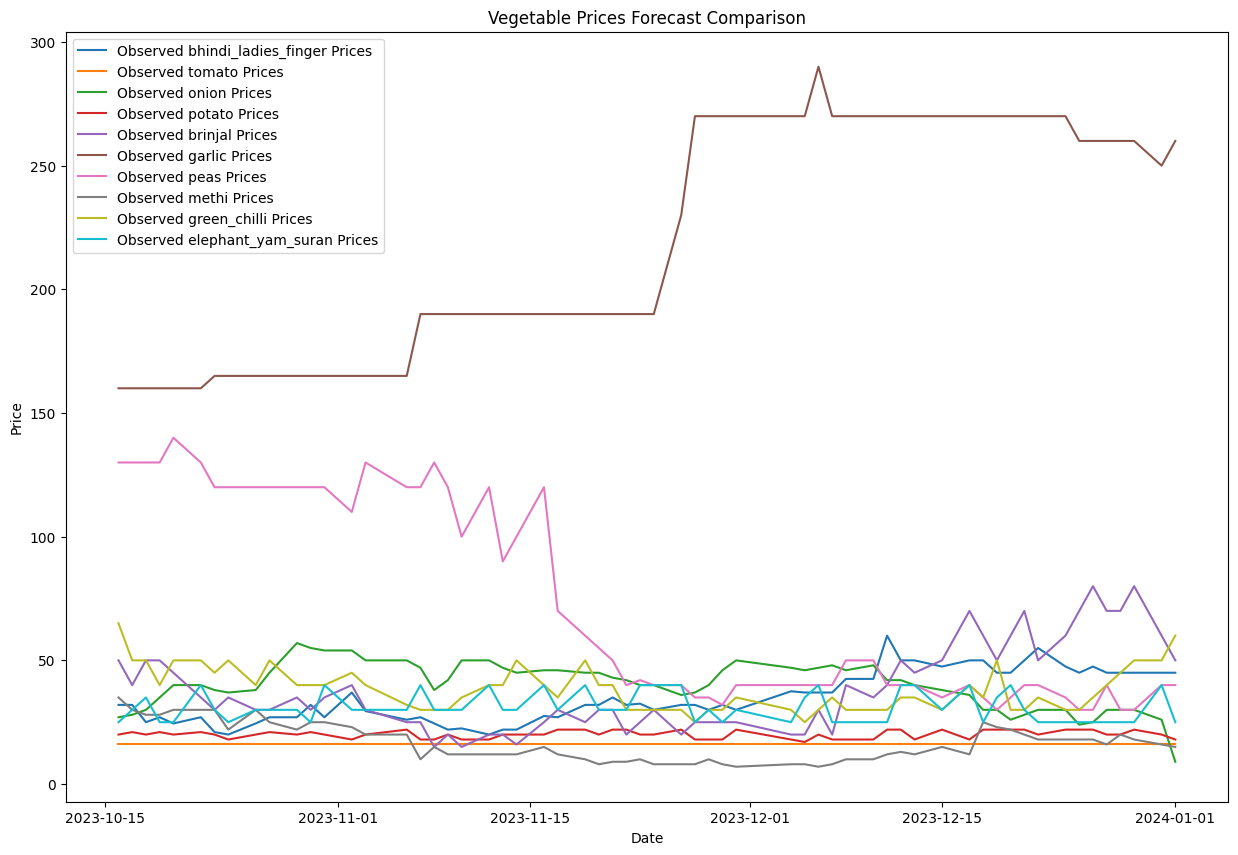

In [29]:
##mean squared error expressed as a percentage for model2
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Sample data for multiple vegetable prices over time
#data = {
#    'date': pd.date_range(start='2022-01-01', periods=365, freq='D'),
#    'bhindi_ladies_finger': np.random.rand(365) * 10 + 20,
#    'tomato': np.random.rand(365) * 8 + 18,
#    'onion': np.random.rand(365) * 5 + 15,
#    'potato': np.random.rand(365) * 5 + 15,
#    'brinjal': np.random.rand(365) * 7 + 17,
 #   'garlic': np.random.rand(365) * 12 + 25,
#    'peas': np.random.rand(365) * 6 + 16,
#    'methi': np.random.rand(365) * 9 + 19,
#    'green_chilli': np.random.rand(365) * 11 + 22,
#    'elephant_yam_suran': np.random.rand(365) * 13 + 28
#}

# Create DataFrame
#df = pd.DataFrame(data)
#df.set_index('date', inplace=True)

# Function to forecast prices using Holt-Winters method
def forecast_prices_holtwinters(df, periods=30):
    model = ExponentialSmoothing(df, trend='mul', seasonal='mul', seasonal_periods=30)
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to forecast prices using ARIMA model
def forecast_prices_arima(df, periods=30):
    model = ARIMA(df, order=(2,1,2))
    fit = model.fit()
    forecast = fit.forecast(periods)
    return forecast

# Function to calculate mean squared error for the forecasts and convert it to percentage
def calculate_mse_percentage(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    mean_actual = np.mean(actual)
    rmse_percentage = (rmse / mean_actual) * 100
    return rmse_percentage

# Forecast the next 30 days for each vegetable using Holt-Winters and ARIMA models
vegetables = ['bhindi_ladies_finger', 'tomato', 'onion', 'potato', 'brinjal', 'garlic', 'peas', 'methi', 'green_chilli', 'elephant_yam_suran']
results = []

for veg in vegetables:
    # Split the data into training and test sets
    train_data = df[veg][:-30]
    test_data = df[veg][-30:]
    
    # Forecast using Holt-Winters method
    hw_forecast = forecast_prices_holtwinters(train_data, periods=30)
    
    # Forecast using ARIMA model
    arima_forecast = forecast_prices_arima(train_data, periods=30)
    
    # Calculate MSE percentage for both methods
    hw_mse_percentage = calculate_mse_percentage(test_data, hw_forecast)
    arima_mse_percentage = calculate_mse_percentage(test_data, arima_forecast)
    
    results.append({
        'Vegetable': veg,
        'Holt-Winters MSE Percentage': hw_mse_percentage,
        'ARIMA MSE Percentage': arima_mse_percentage
    })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)

# Plot the observed and forecasted data for all vegetables
plt.figure(figsize=(15, 10))
for veg in vegetables:
    plt.plot(df.index[-60:], df[veg][-60:], label=f'Observed {veg} Prices')
    
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Prices Forecast Comparison')
plt.legend()
plt.show()



---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
##Explain findings of forecast model testing from MSE results
##Model 1) HoltW Additive 2)Arima 5,1,0
##      Vegetable          Holt-Winters MSE    ARIMA MSE
#0  bhindi_ladies_finger        202.999140   172.651878
#1                tomato          0.001507     0.000000
#2                 onion        137.588592   110.268456
#3                potato          3.102064     4.002670
#4               brinjal        934.387349   852.286481
#5                garlic       4425.878535  5753.333333
#6                  peas      13875.932355    26.352473
#7                 methi        470.451396    46.543666
#8          green_chilli         80.627918    68.158648
#9    elephant_yam_suran         65.953950    53.650153



##Model 2) HoltW Multiplicative 2)Arima 2,1,2
#             Vegetable  Holt-Winters MSE    ARIMA MSE
#0  bhindi_ladies_finger        234.576521   236.302005
#1                tomato          0.001586     0.000000
#2                 onion        337.223522   110.645162
#3                potato          3.028677     3.984173
#4               brinjal       1019.411945   856.627405
#5                garlic       3906.519817  5754.439587
#6                  peas         52.012267   134.378564
#7                 methi        106.277080    83.369628
#8          green_chilli         86.152864    66.621299
#9    elephant_yam_suran         67.987239    52.609043





In [ ]:
Evaluation explanation:
Wxplain the error improvements with the models


In [ ]:
##Explain findings of forecast model testing from MSE results expressed as percentages of accuracy:

##Model 1) HoltW Additive 2)Arima 5,1,0
#              Vegetable           Holt-Winters MSE Percentage  ARIMA MSE Percentage
#0  bhindi_ladies_finger                    33.211601             30.628686
#1                tomato                     0.242589              0.000000
#2                 onion                    32.673583             29.250359
#3                potato                     8.762526              9.953569
#4               brinjal                    65.502322             62.558456
#5                garlic                    25.199726             28.731337
#6                  peas                   312.180603             13.604592
#7                 methi                   158.320376             49.797751
#8          green_chilli                    25.655157             23.588072
#9    elephant_yam_suran                    26.773199             24.147120


##Model 2) HoltW Multiplicative 2)Arima 2,1,2
#             Vegetable         Holt-Winters MSE Percentage        ARIMA MSE Percentage
#0  bhindi_ladies_finger                    35.701378             35.832442
#1                tomato                     0.248939              0.000000
#2                 onion                    51.152219             29.300280
#3                potato                     8.658256              9.930544
#4               brinjal                    68.417638             62.717567
#5                garlic                    23.675060             28.734099
#6                  peas                    19.112950             30.721317
#7                 methi                    75.248741             66.647423
#8          green_chilli                    26.519591             23.320535
#9    elephant_yam_suran                    27.182761             23.911679




---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.
#ARIMA (5,1,0) from Model 1 seems to perform better overall for most vegetables than the Holt winters forecast for Model 1
#ARIMA (2,1,2) from Model 2 also performs better than Model 2 Holt winter but is slightly less consistent than Model 1 Arima

#Therefore, ARIMA (5,1,0) from Model 1 might be the better choice for our forecasting needs of vegatable price predictions


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
